**Configuration et Installation de YOLOv5**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
/content/yolov5/yolov5



**Préparation des Données pour l'Entraînement YOLOv5**

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Chemin vers le dossier contenant toutes les images et labels
dataset_dir = '/content/drive/MyDrive/dataset'

# Identifier toutes les images disponibles (avec labels correspondants)
all_images = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]
all_labels = [f.replace('.jpg', '.txt') for f in all_images]

# Vérification que chaque image a un fichier de label correspondant
paired_data = [(os.path.join(dataset_dir, img), os.path.join(dataset_dir, lbl))
               for img, lbl in zip(all_images, all_labels) if os.path.exists(os.path.join(dataset_dir, lbl))]

# Split automatique : 80% train, 20% validation
train_data, val_data = train_test_split(paired_data, test_size=0.2, random_state=42)

# Enregistrer les chemins dans des fichiers texte temporairement (requis par YOLOv5)
with open('train.txt', 'w') as f:
    f.write('\n'.join([img for img, _ in train_data]))

with open('val.txt', 'w') as f:
    f.write('\n'.join([img for img, _ in val_data]))

# Créer un fichier YAML de configuration pour YOLOv5
with open('data.yaml', 'w') as f:
    f.write('train: ./train.txt\n')
    f.write('val: ./val.txt\n')
    f.write('nc: 1\n')  # Nombre de classes (changez selon vos besoins)
    f.write('names: ["plaque"]\n')  # Noms des classes

**Entraînement du Modèle YOLOv5**

In [ ]:
!python train.py --img 128 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --project yolov5-plates --name exp

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-10-20 13:58:15.143714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 13:58:15.165863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 13:58:15.172433: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

**Chargement et Utilisation du Modèle YOLOv5 pour la Prédiction**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-10-25 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 600x1200 1 plaque
Speed: 38.8ms pre-process, 315.9ms inference, 1.9ms NMS per image at shape (1, 3, 320, 640)


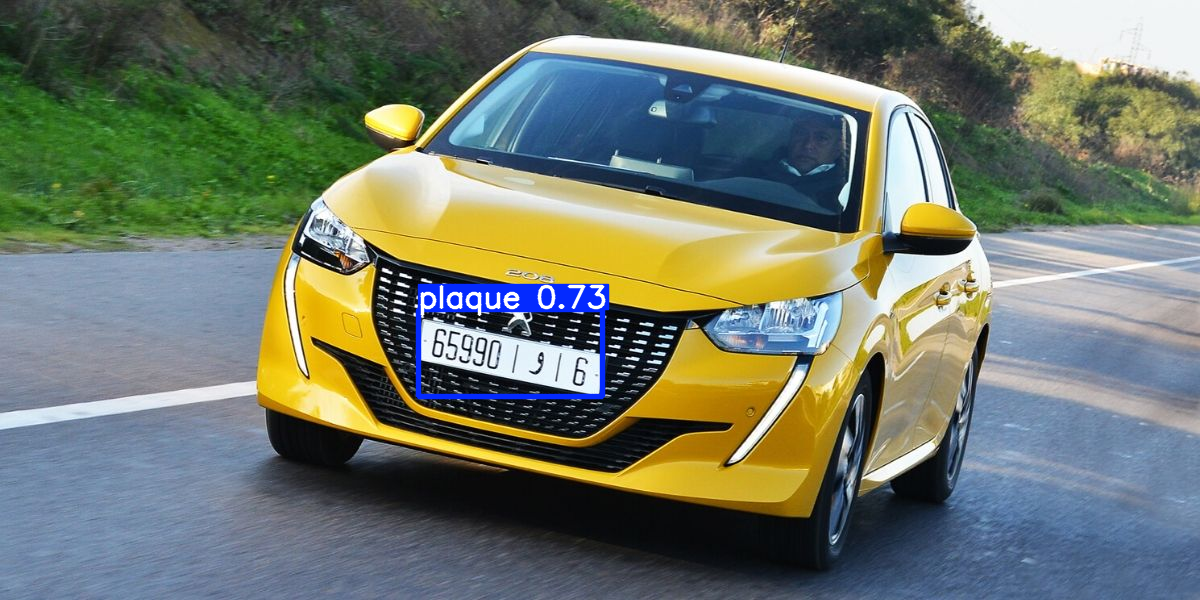

In [ ]:
import torch
from google.colab import drive
drive.mount('/content/drive')

# Charger le modèle YOLOv5 en utilisant torch.hub
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolo_V5_entr/best.pt', force_reload=True)
model.eval()

# Charger une image pour prédiction
img = '/content/drive/MyDrive/208.jpg'  # Remplacez par le chemin de votre image
results = model(img)  # Effectuer la détection

# Afficher les résultats
results.print()  # Affiche les informations de détection
results.show()   # Montre l'image avec les détections


**Exécution de la Détection avec YOLOv5 sur Image "NIS.jpg"**

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolo_V5_entr/best.pt \
--img 128 --conf 0.5 --source /content/drive/MyDrive/NIS.jpg \
--project /content/drive/MyDrive/yolov5_results --name exp --exist-ok

detect: weights=['/content/drive/MyDrive/yolo_V5_entr/best.pt'], source=/content/drive/MyDrive/NIS.jpg, data=data/coco128.yaml, imgsz=[128, 128], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/yolov5_results, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/NIS.jpg: 96x128 1 plaque, 25.8ms
Speed: 0.5ms pre-process, 25.8ms inference, 36.6ms NMS per image at shape (1, 3, 128, 128)
Results saved to /content/drive/MyDrive/yolov5_results/exp


**Affichage de l'Image Détectée avec Résultats de YOLOv5**

L'image détectée existe, chargement...


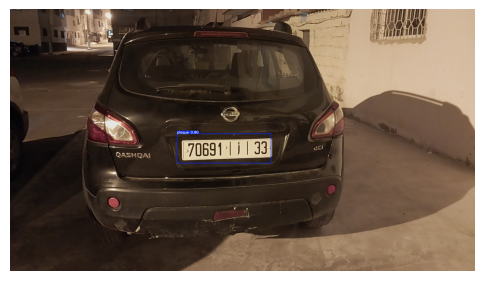

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Chemin vers le répertoire contenant les résultats de la détection
result_image_path = '/content/drive/MyDrive/yolov5_results/exp/NIS.jpg'

# Vérifier si l'image existe
if os.path.exists(result_image_path):
    print("L'image détectée existe, chargement...")

    # Ouvrir et afficher l'image détectée
    img = Image.open(result_image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Désactiver les axes
    plt.show()
    img.show()
else:
    print(f"L'image détectée n'existe pas à l'emplacement: {result_image_path}")

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolo_V5_entr/best.pt \
--img 128 --conf 0.5 --source /content/drive/MyDrive/NIS.jpg \
--project /content/drive/MyDrive/yolov5_results --name exp --exist-ok --save-txt

detect: weights=['/content/drive/MyDrive/yolo_V5_entr/best.pt'], source=/content/drive/MyDrive/NIS.jpg, data=data/coco128.yaml, imgsz=[128, 128], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/yolov5_results, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/NIS.jpg: 96x128 1 plaque, 34.0ms
Speed: 0.3ms pre-process, 34.0ms inference, 1.6ms NMS per image at shape (1, 3, 128, 128)
Results saved to /content/drive/MyDrive/yolov5_results/exp
5 labels saved to /content/drive/MyDrive/yolov5_results/exp/labels


**Extraction et Affichage de la Plaque avec YOLOv5**

L'image et les labels détectés existent, chargement...


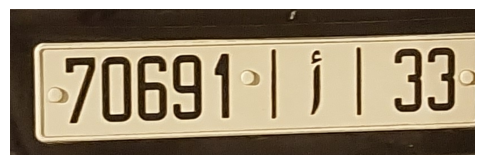

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Chemin vers les résultats de l'image et les coordonnées
image_path = '/content/drive/MyDrive/NIS.jpg'
label_path = '/content/drive/MyDrive/yolov5_results/exp/labels/NIS.txt'

# Vérifier si l'image et les labels existent
if os.path.exists(image_path) and os.path.exists(label_path):
    print("L'image et les labels détectés existent, chargement...")

    # Ouvrir l'image originale
    img = Image.open(image_path)
    img_width, img_height = img.size

    # Lire les coordonnées depuis le fichier texte
    with open(label_path, 'r') as f:
        lines = f.readlines()
        if lines:
            # YOLOv5 retourne : classe, x_center, y_center, width, height (en ratios)
            _, x_center, y_center, width, height = map(float, lines[0].split())

            # Convertir les ratios en pixels
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height

            # Calculer les coins du rectangle
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)

            # Découper la région contenant la plaque
            cropped_img = img.crop((x1, y1, x2, y2))

            # Afficher l'image découpée
            plt.figure(figsize=(6, 6))
            plt.imshow(cropped_img)
            plt.axis('off')  # Désactiver les axes
            plt.show()
            cropped_img.save('/content/drive/MyDrive/yolov5_results/exp/plaque4.jpg')
        else:
            print("Aucune détection trouvée dans le fichier de labels.")
else:
    print("L'image ou les labels n'existent pas à l'emplacement spécifié.")
